In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def run_simultion(directory):
    data = pd.read_csv(directory)
    Bolck1_list = list()
    Bolck2_list = list()
    Bolck3_list = list()
    Bolck4_list = list()
    Bolck5_list = list()
    Whole_Process = list()
    
    
    for j in range(len(data)):
        Bolck1_list.append(data.iat[j, 0])
        Bolck2_list.append(data.iat[j, 1])
        Bolck3_list.append(data.iat[j, 2])
        Bolck4_list.append(data.iat[j, 3])
        Bolck5_list.append(data.iat[j, 4])
        #print(Bolck1_list)
    
    Whole_Process.append(Bolck1_list)
    Whole_Process.append(Bolck2_list)
    Whole_Process.append(Bolck3_list)
    Whole_Process.append(Bolck4_list)
    Whole_Process.append(Bolck5_list)
    
    #print(Whole_Process)
    optimistic = 1/6
    MostLikely = 2/3
    pessimistic = 1/6
    
    Simulation_List = list()
    
    possibility_matrix = np.random.random(size = (100000, 5))
    for i in possibility_matrix:
        TotalTime = list()
        for k in range(len(i)):
            #print(k)
            if i[k] <= optimistic:
                #print(k)
                TotalTime.append(Whole_Process[k][0])
            elif i[k] <= MostLikely:
                TotalTime.append(Whole_Process[k][1])
            else:
                TotalTime.append(Whole_Process[k][2])
        #print(TotalTime)
        Simulation_List.append(sum(TotalTime))
    return Simulation_List
            
            
def show_monte_chart(result):
    

    x=range(0, 100000)


    fig = plt.figure(figsize=(20,10))
    ax = fig.gca()
    #ax.set_xticks(np.linspace(0, 100, 100))
    #ax.set_yticks(np.linspace(50, 500, 5))
    plt.plot(result, x, ls='-', c='black', label='Proportion of Btach Time')
    plt.grid()
    plt.legend()
    #plt.ylim(0,180)
    plt.title('Mote Carlo Simulation', fontsize = 20)
    plt.xlabel('Hour', fontsize = 18)
    plt.ylabel('Number of Instance', fontsize = 18)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    plt.show()

def show_proba_chart(result):
    a = pd.Series(result)
    count_dict = dict()

    b = a.value_counts()
    times = b.to_list()
    index = b.index

    for i in range(len(index)):
        count_dict[index[i]] = times[i]/100000

    plt.figure(figsize=(20,10))
    plt.bar(count_dict.keys(), count_dict.values())
    plt.xlabel("Interval of Batch Time (Hour)", fontsize=18)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    plt.ylabel("Probability", fontsize=18)
    
def show_proba_binning_chart(result):
    a = pd.Series(result)
    count_dict = dict()

    b = a.value_counts()
    times = b.to_list()
    index = b.index

    for i in range(len(index)):
        count_dict[index[i]] = times[i]/100000

    newdict = dict()
    for i in range(len(index)):
        if str(pd.cut(index, 10)[i]) not in newdict:
            newdict[str(pd.cut(index, 10)[i])] = count_dict[index[i]]
        else:
            newdict[str(pd.cut(index, 10)[i])] += count_dict[index[i]]


    sortdict = sorted(newdict.keys())

    #print(sortdict)
    binlist = list()

    for j in range(len(sortdict)):
        binlist.append(newdict[sortdict[j]])

    #newdict
    plt.figure(figsize=(20,10))
    plt.bar(sortdict, binlist, color = 'darksalmon')
    plt.xlabel("Interval of Batch Time (Hour)", fontsize=18)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    plt.ylabel("Probability", fontsize=18)

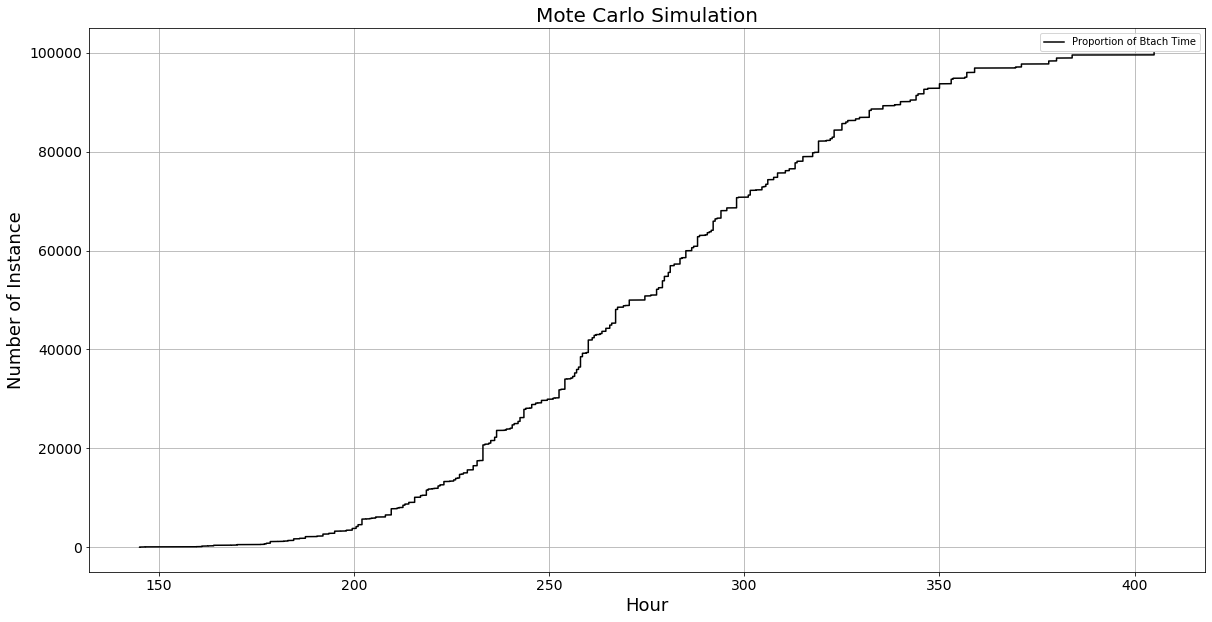

['(144.74, 171.0]', '(171.0, 197.0]', '(197.0, 223.0]', '(223.0, 249.0]', '(249.0, 275.0]', '(275.0, 301.0]', '(301.0, 327.0]', '(327.0, 353.0]', '(353.0, 379.0]', '(379.0, 405.0]']


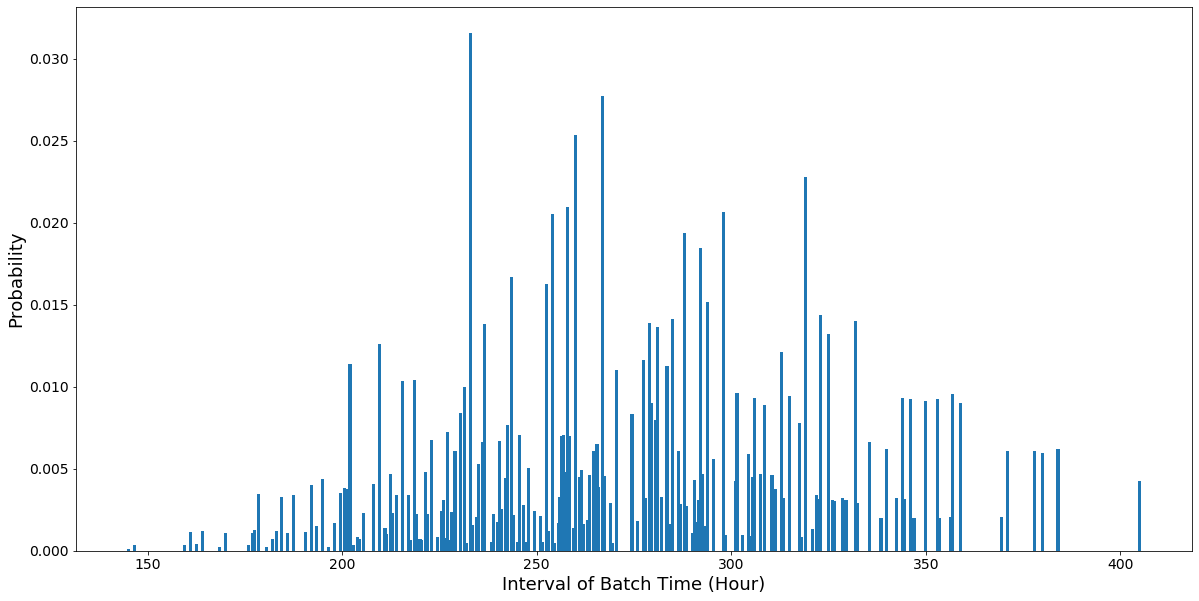

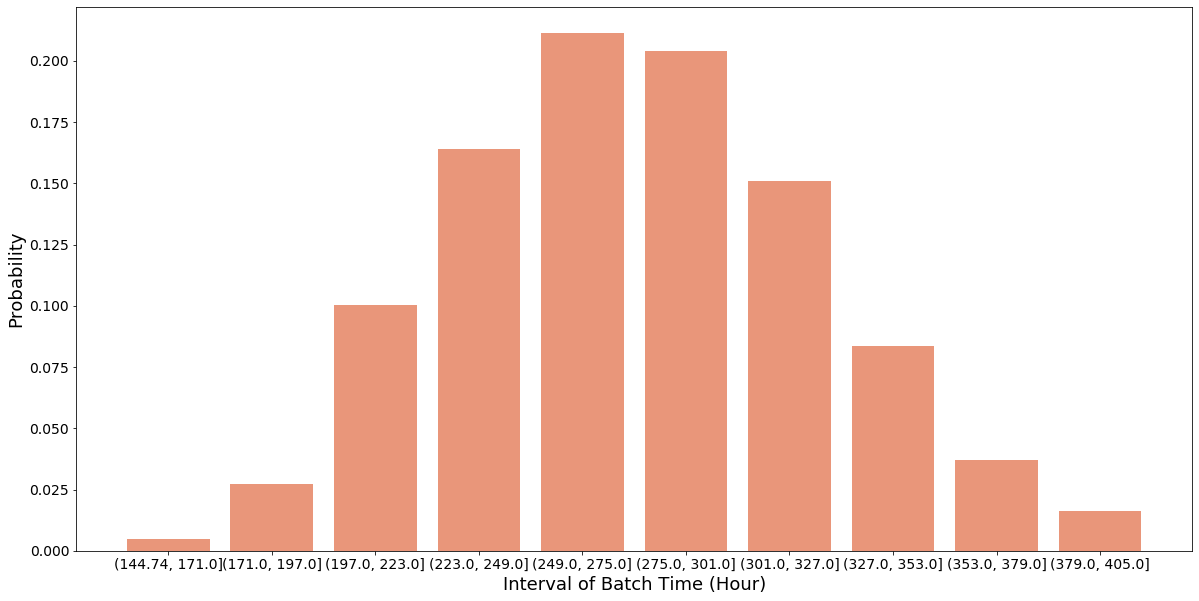